In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


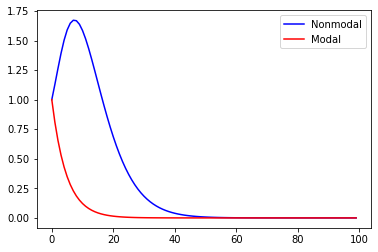

In [2]:
#s = np.random.normal(0, 0.1, 1000)
dim      = 100
growth1  = np.zeros((dim,1))
growth2  = np.zeros((dim,1))
a        = np.array([[0.9,0.3],[0.,0.9]])
x_0      = np.array([[1],[0]])
for tau in range(0,dim):
    G_tau    = np.linalg.matrix_power(a, tau)
    x_tau    = np.matmul(G_tau,x_0)
    h        = np.matmul(np.matrix(G_tau).getH(),G_tau)
    w,v      = np.linalg.eig(h)
    growth1[tau,:] = np.max(w)
    growth2[tau,:] = np.matmul(np.transpose(x_tau),x_tau)/np.matmul(np.transpose(x_0),x_0)

plt.figure()
plt.plot(growth1,'b', label='Nonmodal')
plt.plot(growth2,'r', label='Modal')
plt.legend()
plt.savefig("/content/gdrive/MyDrive/Conference/2022_AMS_annual_meeting/optimal_growth.png")

In [ ]:
# time-dependent basic states example:
# using RK4 for numerical integration 
def f(L,y):
    return np.matmul(L,y)

def rk4(L,t0,y0,tn,n):
    
    # Calculating step size
    h = (tn-t0)/n
    
    #print('\n--------SOLUTION--------')
    #print('-------------------------')    
    #print('x0\ty0\tyn')
    #print('-------------------------')
    for i in range(n):
        k1 = h * (f(L,y0))
        k2 = h * (f(L,(y0+k1/2)))
        k3 = h * (f(L,(y0+k2/2)))
        k4 = h * (f(L,(y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        #print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        #print('-------------------------')
        y0 = yn
        #print(y0)
        t0 = t0+h
    return yn


In [ ]:
# see Ch5 of Palmer and Hagedorn 2008 for more details: https://www.cambridge.org/core/books/predictability-of-weather-and-climate/9A8E7E0A16BC8BA928243F46ED192FE6 
# using RK4 for numerical integration
omega1  = 3
omega2  = 0.5
A1      = np.array([[0,1],[-omega1**2,0]])
A2      = np.array([[0,1],[-omega2**2,0]])
v       = np.array([[1],[0]])
record  = np.zeros((1000,2))
record[0,:] = np.reshape(v,[2,])
record2 = np.zeros((10,1000,2))
t       = 0
count   = 0
for i in range(10):
    # swapping linear operator for every quarterly period
    if (i % 4) == 0:
      A=A1
      omega=omega1
    elif (i % 4) == 1:
      A=A2
      omega=omega2
    elif (i % 4) == 2:
      A=A1
      omega=omega1
    elif (i % 4) == 3:
      A=A2
      omega=omega2
    v_template       = v
    for j in range(999): # fixed operator
        t_index          = np.linspace(0,20,1000)
        v_new            = rk4(A,t_index[j],v_template,t_index[j+1],100)
        record2[i,j,:]   = np.reshape(v_new,[2,])
        v_template       = v_new
    for j in range(100): # swapping linear operators 
        t_index         = np.linspace(0,np.pi/(2*omega),101)
        v_new           = rk4(A,t_index[j],v,t_index[j+1],100)
        record[count,:] = np.reshape(v_new,[2,])
        count           = count+1
        v               = v_new
    
  
    

working A1
working A2
working A3
working A4
working A1
working A2
working A3
working A4
working A1
working A2


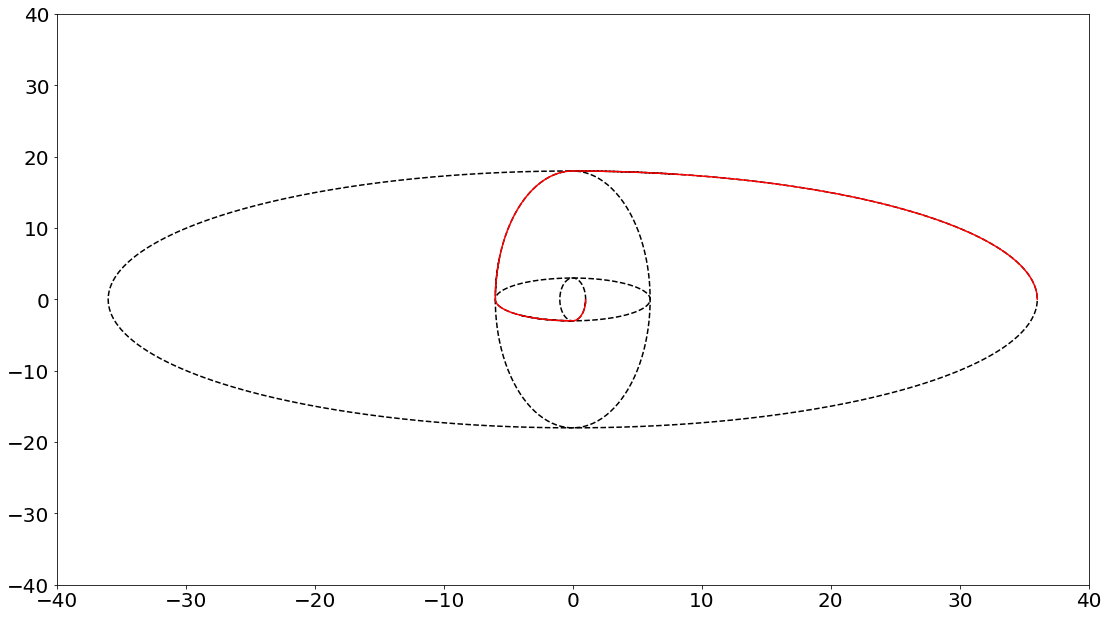

In [ ]:
fig=plt.figure()
plt.plot(record2[0,0:110,0],record2[0,0:110,1],'k--')
plt.plot(record2[1,0:700,0],record2[1,0:700,1],'k--')
plt.plot(record2[2,0:110,0],record2[2,0:110,1],'k--')
plt.plot(record2[3,0:650,0],record2[3,0:650,1],'k--')
plt.plot(record[0:400,0],record[0:400,1],'r')
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.set_size_inches(18.5, 10.5)

plt.savefig("/content/gdrive/MyDrive/Conference/2022_AMS_annual_meeting/error_growth.png")